# Uloha 2

### Z obou datových souborů načtěte texty k analýze. Pro každý text zvlášť odhadněte základní charakteristiky délek slov, tj. střední hodnotu a rozptyl. Graficky znázorněte rozdělení délek slov.

In [3]:
import scipy.stats as st
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

with open('014.txt') as f:
    Y_title, Y_data = f.readlines()
    
with open('016.txt') as f:
    X_title, X_data = f.readlines()
    
Y_length = len(Y_data)
X_length = len(X_data)

Vyberovy prumer a vyberovy rozptyl jsou hledane statistiky.
Využijime jejich implementace ze SciPy. 
Rozdeleni delek slov je diskretni nahodnou velicinou, ktera nabyvs ruznych hodnot delek slov. Zjistime jejich rozsah.

In [2]:
Y_words, X_words = Y_data.split(' '), X_data.split(' ')
Y_words_len, X_words_len = [len(y) for y in Y_words], [len(x) for x in X_words]
len_min = min(min(Y_words_len), min(X_words_len))
len_max = max(max(Y_words_len), max(X_words_len))
len_min, len_max

(1, 14)

Rozdeleni delek textu muzeme odhadnout pomoci formule $p_i = \frac{N_i}{n}$, kde $i \in (1, 14)$, $n$ je celkovy pocet slov v textu a $N_i$ je pocet slov delky $i$

Grafickemu znazorneni odhadu rozdeleni nejlepe vyhovuje histogram se biny pro kazdou moznou delku slova.

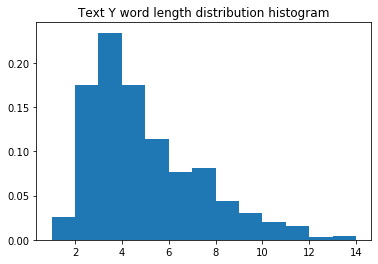

In [10]:
 def show_hist(data, name):
    plt.figure()
    lo, hi = min(data), max(data) + 1
    dens, bins, _ = plt.hist(data, bins=range(len_min, len_max + 1), density=True)
    plt.title('Text ' + name + ' word length distribution histogram')
    return list(zip(bins, dens))

Y_len_dist, X_len_dist = show_hist(Y_words_len, 'Y'), show_hist(X_words_len, 'X')

V obou pripadech je videt, ze distribuce delek slov je asymetricka a posunuta doleva. Rozdeleni pro oba texty vypadaji podobne.

In [14]:
Y_len_mean, X_len_mean = st.tmean(Y_words_len), st.tmean(X_words_len)
Y_len_var, X_len_var = st.tvar(Y_words_len), st.tvar(X_words_len)
print("Y mean: " + str(Y_len_mean) + " var: " + str(Y_len_var))
print("X mean: " + str(X_len_mean) + " var: " + str(X_len_var))

Y mean: 4.478947368421053 var: 5.672076151748995
X mean: 4.0856 var: 5.1592


### Pro každý text zvlášť odhadněte pravděpodobnosti písmen (symbolů mimo mezery), které se v textech vyskytují. Výsledné pravděpodobnosti graficky znázorněte.

Odhadneme rozdeleni pismen v textu X a Y bez mezer. To udelame pomoci odhadu pravdepodobnosti vyskytu pismen v textu. Pravdepodobnost vyskytu kazdeho pismena v textu je rovna pomeru vyskytu pismena v texte k celkovemu poctu pismen.

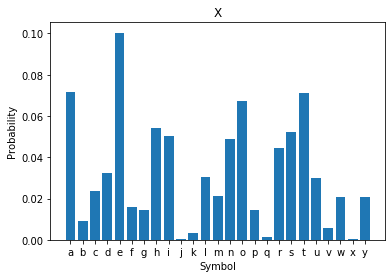

In [18]:
def calculate_probability(text, length):
    translation_table = str.maketrans('', '', ' ')
    sample_str = text.translate(translation_table)
    ctr = Counter(sample_str)
    symbols, counts = zip(*sorted(ctr.items()))
    probability = [x / length for x in counts]
    return symbols, probability

def plot(symbols, probability, name):
    xpos = range(len(symbols))
    plt.bar(xpos, probability)
    plt.xticks(xpos, symbols)
    plt.xlabel('Symbol')
    plt.ylabel('Probability')
    plt.title(name)
    plt.show()
    
Y_symbols, Y_probability = calculate_probability(Y_data, Y_length)
X_symbols, X_probability = calculate_probability(X_data, X_length)

plot(Y_symbols, Y_probability, 'Y')
plot(X_symbols, X_probability, 'X')

### Na hladině významnosti 5% otestujte hypotézu, že rozdělení délek slov nezávisí na tom, o který jde text. Určete také p-hodnotu testu.

To co chceme otestovat je zavislost techto rozdeleni. Chceme tedy na hladině 5% zamitnout hypotezu, ze tato dve rozdeleni delek slov jsou nezavisle.

Hypotezy budou znit takto:

$H_0$: rozdělení slov $Y$ (14.txt) a $X$ (16.txt) jsou nezavisla

$H_A$: rozdělení slov $Y$ (14.txt) a $X$ (16.txt) jsou zavisla

Vyuzijeme k tomu Chi kvadrat test nezavislosti pomoci kontingencni tabulky. Kontingencni tabulka bude obsahovat cetnosti delek slov pro oba texty (pro kazdy text jeden radek). Tento test pocita Pearsonovu statistiku $\chi^2$ pomoci teoretických a skutecnych cetnosti delek slov. Vyuzijme implementace ze knihovny SciPy. Tato implementace vrati rovnou p-hodnotu. Pokud bude tato menší nebo rovna $\alpha$, $H_0$ zamitneme. Potrebujeme získat cetnosti delek slov pro oba texty a sestrojit kontingencni tabulku, kterou pak predame do knihovny SciPy:

In [49]:
def get_counts(data):
    ctr = Counter(data)
    res = [0] * max(ctr.keys())
    for k, v in ctr.items():
        res[k - 1] = v
    return res

Y_counts, X_counts = get_counts(Y_words_len), get_counts(X_words_len)
cont_table = [Y_counts, X_counts + [0] * 2] # vyrovani poctu prvku v tabulce
cont_table

[[29, 200, 267, 199, 130, 88, 92, 50, 35, 23, 18, 4, 3, 2],
 [60, 236, 355, 226, 111, 56, 79, 54, 31, 18, 17, 7, 0, 0]]

Ted odhadneme pravdepodobnosti jednotlivych moznosti metodou minimalniho $\chi^2$ a dostaneme teoreticke cetnosti:

In [50]:
import numpy as np

def teoretical(table):
    col_sum, row_sum = table.sum(0), table.sum(1)
    total = sum(row_sum)
    return row_sum[:, None] @ col_sum[None, :] / total

teoretical(np.array(cont_table))

array([[ 42.45188285, 207.9665272 , 296.68619247, 202.71966527,
        114.9539749 ,  68.68619247,  81.56485356,  49.60669456,
         31.48117155,  19.55648536,  16.69456067,   5.24686192,
          1.43096234,   0.9539749 ],
       [ 46.54811715, 228.0334728 , 325.31380753, 222.28033473,
        126.0460251 ,  75.31380753,  89.43514644,  54.39330544,
         34.51882845,  21.44351464,  18.30543933,   5.75313808,
          1.56903766,   1.0460251 ]])

Bohuzel jsme se dostali do stavu ve kterem jeste nemuzeme provest test nezavislosti. Vime, ze tento typ tesu se nechova dobre, pokud mame teoreticke cetnosti mensi nez 5. Musime teda sloucit nektere sloupce do jednoho. Nektera slova jsou nezvykle dlouha a tim padem sloucil bych vsechna slova delky 12 a vic do jedneho pripadu.

In [51]:
cont_table = [Y_counts[:11] + [sum(Y_counts[11:])], X_counts[:11] + [sum(X_counts[11:])]]
teoretical(np.array(cont_table))

array([[ 42.45188285, 207.9665272 , 296.68619247, 202.71966527,
        114.9539749 ,  68.68619247,  81.56485356,  49.60669456,
         31.48117155,  19.55648536,  16.69456067,   7.63179916],
       [ 46.54811715, 228.0334728 , 325.31380753, 222.28033473,
        126.0460251 ,  75.31380753,  89.43514644,  54.39330544,
         34.51882845,  21.44351464,  18.30543933,   8.36820084]])

Ted uz muzeme provest test nezavislosti:

In [52]:
st.chi2_contingency(cont_table)

(33.826516751849965,
 0.0003860858408344678,
 11,
 array([[ 42.45188285, 207.9665272 , 296.68619247, 202.71966527,
         114.9539749 ,  68.68619247,  81.56485356,  49.60669456,
          31.48117155,  19.55648536,  16.69456067,   7.63179916],
        [ 46.54811715, 228.0334728 , 325.31380753, 222.28033473,
         126.0460251 ,  75.31380753,  89.43514644,  54.39330544,
          34.51882845,  21.44351464,  18.30543933,   8.36820084]]))

Test vratil p-hodnotu 0.038%, coz je mensi, nez 5%. Proto, na hladine spolehlivosti 5% hypotezu $H_0$ zamitam ve prospech $H_A$.

### Na hladině významnosti 5% otestujte hypotézu, že se střední délky slov v obou textech rovnají. Určete také p-hodnotu testu.

Pro tento druh testu pouzivame dvouvyberovy t-test, protoze jedna se o test hypotez o stredni hodnote pro 2 vybery z prislusnych rozdeleni. Test funguje pro rozdeleni s normalnim rozdelenim vyberoveho prumeru. To jsou normalni rozdeleni a asymptoticky i pro ostatni (coz je nas pripad, protoze rozdeleni je posunute doleva). Dvouveberovy test ma dve varianty podle toho jsou-li stejne vyberove rozptyly. Udelame Levenov test implementovany ve SciPy (defaultne je pouzita Brown-Forsythe variatna, ktera je vhodnejsi pro asymetricka rozdeleni). 

Testujeme teda:

$H_0$ rozptyly rozdělení $Y$ (14.txt) a $X$ (16.txt) jsou stejne

$H_A$ rozptyly rozdělení $Y$ (14.txt) a $X$ (16.txt) nejsou stejne

In [53]:
st.levene(Y_words_len, X_words_len)

LeveneResult(statistic=4.070067077991522, pvalue=0.04376121451433848)

Na hladine spolehlivosti 5% procent muzeme zamitnout $H_0$, protoze 4.5% < 5%.

Muzeme ted sformulovat hypotezy pro prumer:

$H_0$: stredny delky slov $Y$ (14.txt) a $X$ (16.txt) se rovnaji 

$H_A$: stredné delky slov $Y$ (14.txt) a $X$ (16.txt) jsou ruzne

Vyuzijeme implementace ve SciPy.

In [56]:
st.ttest_ind(Y_words_len, X_words_len, equal_var=False)

Ttest_indResult(statistic=4.1227517865058125, pvalue=3.874086666390881e-05)

Test vratil p-hodnotu 0.003%, coz je vyrazne mensi, nez 5%. Proto, na hladine spolehlivosti 5%, hypotezu $H_0$ zamitam ve prospech $H_A$.

### Na hladině významnosti 5% otestujte hypotézu, že rozdělení písmen nezávisí na tom, o který jde text. Určete také p-hodnotu testu.

Podobně jako ve třetím bodě jedna se o test nezavislosti, proto muzeme vyuzit chí kvadrát test nezavislosti s pouzitim kontingencni tabulky.
Postup je analogicky postupu z bodu 3. 

$H_0$ rozdeleni pismen $Y$ (14.txt) a $X$ (16.txt) jsou nezavisla

$H_A$ rozdeleni pismen $Y$ (14.txt) a $X$ (16.txt) jsou zavisla

Zacneme sestavenim kontingencni tabulky a odhadem pravdepodobnosti jednotlivych možnosti metodou minimálního $\chi^2$ a spočítáme teoretické četnosti:

In [64]:
def get_char_counts(data):
    translation_table = str.maketrans('', '', ' ')
    sample_str = data.translate(translation_table)
    ctr = Counter(sample_str)
    res = [0] * 26
    for k, v in ctr.items():
        res[ord(k) - ord('a')] = v
    return res

Y_char_counts, X_char_counts = get_char_counts(Y_data), get_char_counts(X_data)
cont_char_table = [Y_char_counts, X_char_counts]
print(cont_char_table)
teoretical(np.array(cont_char_table))

[[424, 78, 121, 236, 652, 134, 98, 337, 328, 7, 35, 170, 113, 356, 386, 76, 4, 335, 334, 476, 133, 50, 125, 4, 92, 2], [455, 58, 151, 205, 638, 100, 91, 344, 321, 2, 21, 192, 135, 310, 427, 91, 8, 284, 331, 453, 189, 36, 132, 2, 131, 0]]


array([[439.45696661,  67.99334182, 135.98668364, 220.47840987,
        644.9368452 , 116.98854401,  94.49074709, 340.46666014,
        324.46822677,   4.49955939,  27.9972584 , 180.98227749,
        123.98785861, 332.9673945 , 406.46019779,  83.49182415,
          5.99941251, 309.46969549, 332.46744345, 464.45451875,
        160.98423578,  42.99578968, 128.487418  ,   2.99970626,
        111.48908254,   0.99990209],
       [439.54303339,  68.00665818, 136.01331636, 220.52159013,
        645.0631548 , 117.01145599,  94.50925291, 340.53333986,
        324.53177323,   4.50044061,  28.0027416 , 181.01772251,
        124.01214139, 333.0326055 , 406.53980221,  83.50817585,
          6.00058749, 309.53030451, 332.53255655, 464.54548125,
        161.01576422,  43.00421032, 128.512582  ,   3.00029374,
        111.51091746,   1.00009791]])

Opet v tabulce jsou prvky s teoretickymi cetnostmi mensimi, nez 5. Musime teda slouzit nejmin pouzivana pismena v textech (z, x, q, j):

In [65]:
Y_char_counts.append(Y_char_counts.pop(25) + Y_char_counts.pop(23) + Y_char_counts.pop(16) + Y_char_counts.pop(9))
X_char_counts.append(X_char_counts.pop(25) + X_char_counts.pop(23) + X_char_counts.pop(16) + X_char_counts.pop(9))
cont_char_table = [Y_char_counts, X_char_counts]
teoretical(np.array(cont_char_table))

array([[439.45696661,  67.99334182, 135.98668364, 220.47840987,
        644.9368452 , 116.98854401,  94.49074709, 340.46666014,
        324.46822677,  27.9972584 , 180.98227749, 123.98785861,
        332.9673945 , 406.46019779,  83.49182415, 309.46969549,
        332.46744345, 464.45451875, 160.98423578,  42.99578968,
        128.487418  , 111.48908254,  14.49858024],
       [439.54303339,  68.00665818, 136.01331636, 220.52159013,
        645.0631548 , 117.01145599,  94.50925291, 340.53333986,
        324.53177323,  28.0027416 , 181.01772251, 124.01214139,
        333.0326055 , 406.53980221,  83.50817585, 309.53030451,
        332.53255655, 464.54548125, 161.01576422,  43.00421032,
        128.512582  , 111.51091746,  14.50141976]])

Ted teoreticke cetnosti jsou ok a tim padem muzeme provest test:

In [66]:
st.chi2_contingency(cont_char_table)

(53.078373817221994,
 0.00022147158694788975,
 22,
 array([[439.45696661,  67.99334182, 135.98668364, 220.47840987,
         644.9368452 , 116.98854401,  94.49074709, 340.46666014,
         324.46822677,  27.9972584 , 180.98227749, 123.98785861,
         332.9673945 , 406.46019779,  83.49182415, 309.46969549,
         332.46744345, 464.45451875, 160.98423578,  42.99578968,
         128.487418  , 111.48908254,  14.49858024],
        [439.54303339,  68.00665818, 136.01331636, 220.52159013,
         645.0631548 , 117.01145599,  94.50925291, 340.53333986,
         324.53177323,  28.0027416 , 181.01772251, 124.01214139,
         333.0326055 , 406.53980221,  83.50817585, 309.53030451,
         332.53255655, 464.54548125, 161.01576422,  43.00421032,
         128.512582  , 111.51091746,  14.50141976]]))

Test vratil p-hodnotu 0.022%, coz je mensi, nez 5%. Proto, na hladine spolehlivosti 5%, hypotezu $H_0$ zamitam ve prospech $H_A$.